# Data anaylsis

### Importing libraries

In [84]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [85]:
colors_image_formats= ["#F6511D", "#3B8EA5","#7FB800","#9e73ff"]
color_browsers = ["#EE6352","#59CD90","#3fa7d6","#FAC05E","#F79D84","#5e5e5e"]

## Aggregate data

In [86]:
folder_path = "./raw_data_macOS/websites/"
df_combined = pd.DataFrame()
file_list = os.listdir(folder_path)
column_names = ["run_id","browser","image_format","FP","FCP","TTFB","PLT","fetch_time"]

df_csv_concat = pd.concat([pd.read_csv(folder_path + file, names=column_names) for file in file_list], ignore_index=True)
df_csv_concat = df_csv_concat.sort_values(["run_id"])
print(df_csv_concat.head())
df_csv_concat.to_csv("combined_website_performance_data.csv",index=False)

      run_id        browser image_format         FP    FCP  TTFB   PLT  \
0          1         chrome          png  undefined  191.2  13.7  1515   
1570       2          opera          png  undefined  594.6  11.5  1614   
788        3        firefox          png  undefined  143.0    25  1624   
2368       4  edge_chromium          png  undefined  161.5  12.3  1685   
3161       5         safari          png  undefined  260.0    52  1543   

      fetch_time  
0           79.2  
1570       403.0  
788         75.0  
2368        99.8  
3161        80.0  


# Visualization of data

### Only images without browsers

In [87]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()
    
    # print statistics 
    print("Statistics for " + metric + " by image format")
    print(df.groupby("image_format")[metric].describe())
    

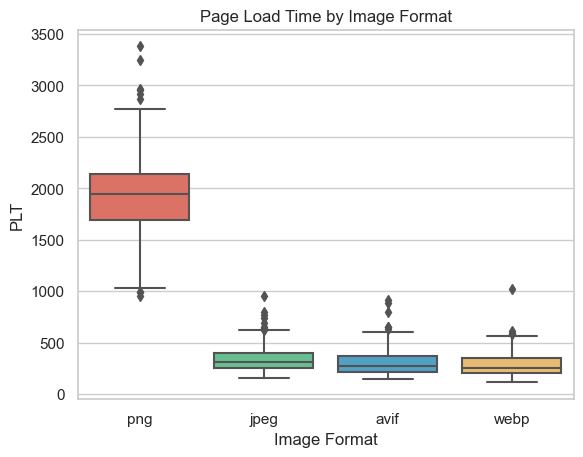

Statistics for PLT by image format
              count         mean         std    min      25%     50%      75%  \
image_format                                                                    
avif          993.0   303.342397  111.361133  147.0   216.00   271.0   372.00   
jpeg          997.0   336.777332  108.574464  152.0   255.00   312.0   402.00   
png           962.0  1933.510395  329.260320  955.0  1691.75  1943.0  2141.75   
webp          995.0   282.727638  104.232247  114.0   202.00   258.0   351.50   

                 max  
image_format          
avif           910.0  
jpeg           949.0  
png           3377.0  
webp          1018.0  


In [88]:
visualize_metrix_boxplot_by_image_format("PLT")

### Metric Boxplot per Image_format 

In [89]:
def visualize_metrix_boxplot_by_image_format(metric):
    df = pd.read_csv("combined_website_performance_data.csv")
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, hue="browser",palette=color_browsers)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

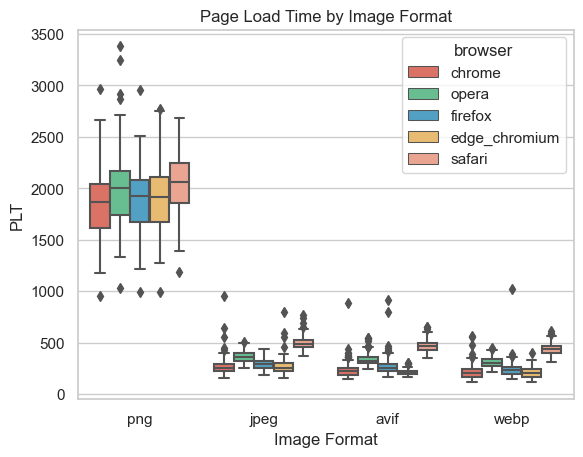

In [90]:
visualize_metrix_boxplot_by_image_format("PLT")

### Boxplot per metric and BROWSER

In [91]:
def boxplot_per_metric_and_browser(metric,browser):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["browser"]==browser]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="image_format", y=metric, palette=colors_image_formats)
    plt.title("Page Load Time by Image Format")
    plt.xlabel("Image Format")
    plt.ylabel(metric)
    plt.savefig("plt_by_image_format.png")
    plt.show()

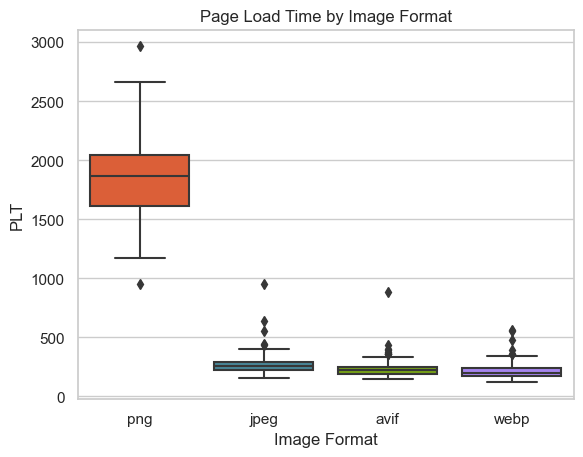

In [92]:
boxplot_per_metric_and_browser('PLT', 'chrome')

### Boxplot per metric and IMAGE_FORMAT

In [93]:
def boxplot_per_metric_and_browser(metric,image_formats):
    df = pd.read_csv("combined_website_performance_data.csv")
    df = df[df["image_format"].isin(image_formats)]
    sns.set(style="whitegrid")
    sns.boxplot(data=df, x="browser", y=metric, hue="image_format", palette="Set1")
    plt.xlabel("Browser")
    plt.ylabel(metric)  
    plt.show()

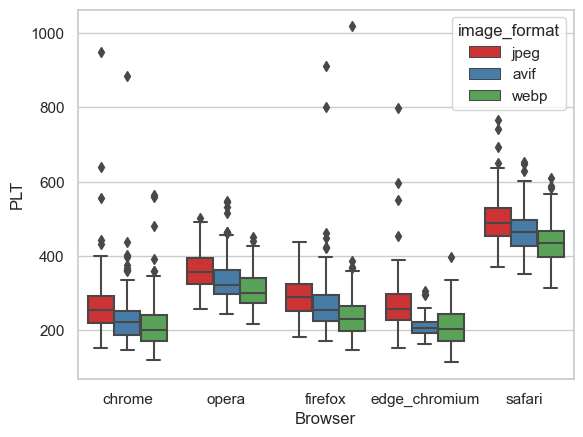

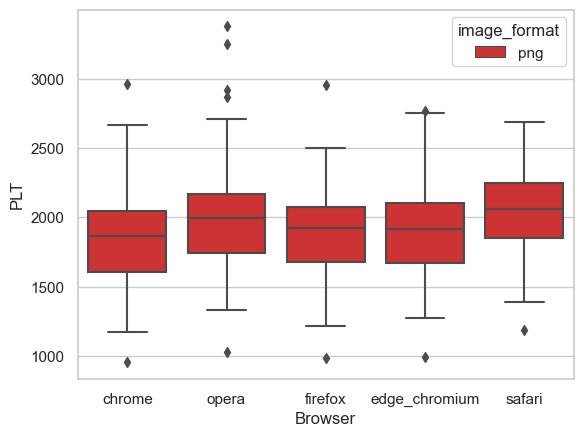

In [94]:
boxplot_per_metric_and_browser("PLT",["jpeg","avif","webp"])
boxplot_per_metric_and_browser("PLT",["png"])

## Combine PLT per Browser and Image Format

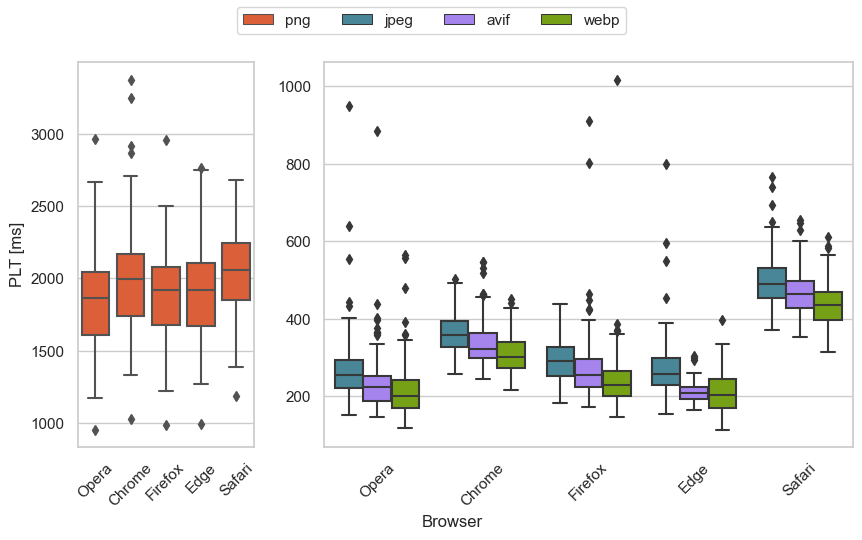

In [95]:
colors_image_formats= ["#F6511D", "#3B8EA5","#9e73ff","#7FB800"]

df = pd.read_csv("combined_website_performance_data.csv")
fig, axes = plt.subplots(1, 2, figsize=(10,5), gridspec_kw={'width_ratios': [1, 3]})
fig.text(0.5, -0.05, 'Browser', ha='center')

sns.set(style="whitegrid")
df_left = df[df["image_format"].isin(["png"])]
ax = sns.boxplot(ax=axes[0], data=df_left, x="browser", y="PLT", palette=colors_image_formats[0:1], hue="image_format",saturation=0.75,)
ax.set_ylabel("PLT [ms]")
ax.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Safari"], rotation=45)
ax.set_xlabel("")
ax.legend([],[], frameon=False)


df_right = df[df["image_format"].isin(["jpeg","avif","webp"])]
ax2 = sns.boxplot(ax=axes[1], data=df_right, x="browser", y="PLT", hue="image_format", palette=colors_image_formats[1:4],saturation=0.75,)
ax2.set_xticklabels(["Opera", "Chrome", "Firefox", "Edge", "Safari"], rotation=45)
ax2.legend([],[], frameon=False)
ax2.set_xlabel("")
ax2.set_ylabel("")

lines = []
labels = []
counter = 0

for ax in fig.axes:
    Line, Label = ax.get_legend_handles_labels()
    lines.extend(Line)
    labels.extend(Label)
  
# rotating x-axis labels of last sub-plot
plt.xticks(rotation=45)
  
fig.legend(lines, labels, loc='upper center', ncol=4, fancybox=True)
plt.show()


One-Way-Anova between image formats per Browser

In [96]:
# One-Way Anova for one browser and image format
metric = "PLT"
df = pd.read_csv("combined_website_performance_data.csv")
size = 60

browsers = ["opera","chrome","firefox","edge_chromium","safari"]
image_formats = ["png","jpeg","webp","avif"]

for browser in browsers:
    df_browser = df[df["browser"] == browser]
    png = df_browser[df_browser["image_format"] == "png"].sample(n=size, random_state=1)
    jpg = df_browser[df_browser["image_format"] == "jpeg"]
    webp = df_browser[df_browser["image_format"] == "webp"]
    avif = df_browser[df_browser["image_format"] == "avif"]
    
    print("Browser: ", browser)
    print(stats.f_oneway(png[metric], jpg[metric], webp[metric], avif[metric]))

    # f_oneway returns F-statistic and p-value
    print("- PNG: ", stats.normaltest(png[metric]))
    print("- JPG: ", stats.normaltest(jpg[metric]))
    print("- WEBP: ", stats.normaltest(webp[metric]))
    print("- AVIF: ", stats.normaltest(avif[metric]))   
    # print mean and Q1 and Q3
    print("-- PNG: (Q1: ", np.quantile(png[metric], 0.25), ", mean: ", np.median(png[metric]), ", Q3: ", np.quantile(png[metric], 0.75), ")")
    print("-- JPG: (Q1: ", np.quantile(jpg[metric], 0.25), ", mean: ", np.median(jpg[metric]), ", Q3: ", np.quantile(jpg[metric], 0.75), ")")
    print("-- WEBP: (Q1: ", np.quantile(webp[metric], 0.25), ", mean: ", np.median(webp[metric]), ", Q3: ", np.quantile(webp[metric], 0.75), ")")
    print("-- AVIF: (Q1: ", np.quantile(avif[metric], 0.25), ", mean: ", np.median(avif[metric]), ", Q3: ", np.quantile(avif[metric], 0.75), ")")
    



Browser:  opera
F_onewayResult(statistic=3271.0664154001593, pvalue=0.0)
- PNG:  NormaltestResult(statistic=17.09094777063365, pvalue=0.000194423092324177)
- JPG:  NormaltestResult(statistic=4.352357484277255, pvalue=0.11347431784719907)
- WEBP:  NormaltestResult(statistic=7.853301270264577, pvalue=0.019709576686671514)
- AVIF:  NormaltestResult(statistic=42.679986024149684, pvalue=5.397079197395574e-10)
-- PNG: (Q1:  1697.5 , mean:  1895.0 , Q3:  2147.25 )
-- JPG: (Q1:  326.0 , mean:  358.0 , Q3:  395.25 )
-- WEBP: (Q1:  274.0 , mean:  301.5 , Q3:  340.5 )
-- AVIF: (Q1:  298.0 , mean:  323.0 , Q3:  363.0 )
Browser:  chrome
F_onewayResult(statistic=3125.545222826788, pvalue=0.0)
- PNG:  NormaltestResult(statistic=0.1727079204566865, pvalue=0.9172694968314615)
- JPG:  NormaltestResult(statistic=209.75488711861976, pvalue=2.8333810572347636e-46)
- WEBP:  NormaltestResult(statistic=118.52446539704148, pvalue=1.8312150702304657e-26)
- AVIF:  NormaltestResult(statistic=228.13973776438178, p

# Two-Way-Anova

In [97]:
df = pd.read_csv("combined_website_performance_data.csv")

model = ols('PLT ~ C(browser) + C(image_format) + C(browser):C(image_format)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

# https://www.statology.org/two-way-anova-python/ 
# Both image_format and browser are significant and not depend 

,sum_sq,df,F,PR(>F)
C(browser),2.765703e+07,4.0,246.007159,8.268193e-189
C(image_format),1.926031e+09,3.0,22842.525044,0.000000e+00
C(browser):C(image_format),9.978169e+05,12.0,2.958501,4.061792e-04
Residual,1.103720e+08,3927.0,NaN,NaN
